In [138]:
#imports 
import json
import copy
import os
from pathlib import Path
import numpy as np 
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
save_directory = '/Users/owainthorp/Documents/Coding/Project/Data/Top15'
file_name = 'T15 giro-d-italia 2000-2023.csv'
data_path = os.path.join(save_directory, file_name)

df = pd.read_csv(data_path)
giro = df.iloc[:,1:].values  # Features


In [116]:
def convert_to_array(data_):
    
    '''
    Function converts last column to an array of floats(if possible)
    '''
    
    data = copy.deepcopy(data_)
    
    row_hit_list = []
    for i, row in enumerate(data):
        
        try:
            
            #try converting into an array
            array = json.loads(row[-1])
            if isinstance(array, list):
                row[-1] = array
            
            #some error 
            else:
                row[-1] = None
        
        except:
            row[-1] = None
            row_hit_list.append(i)
    
    
    #remove the rows we do not want 
    if row_hit_list:
        data = np.delete(data, row_hit_list, axis=0)
    
    return data 

def remove_none(data_):
    
    data = copy.deepcopy(data_)
    row_hit_list = []
    for i, row in enumerate(data):
        
        if None in row:
            row_hit_list.append(i)
            
    if row_hit_list:
        data = np.delete(data, row_hit_list, axis = 0)
        
    return data

def convert_one_hot(data_):
    
    data = copy.deepcopy(data_)
    data = convert_to_array(data)
    data = remove_none(data)
    
    for row in data:
        
        numpy_data = np.array(row[-1], dtype = float)
        
        all_15 = np.sum(numpy_data)
        all_14 = all_15 - numpy_data[0]
        all_13 = all_14 - numpy_data[1]
        all_12 = all_13 - numpy_data[2]
        all_11 = all_12 - numpy_data[3]
        all_10 = all_11 - numpy_data[4]
        
        if (all_15 == 0) or (all_14 == 0) or (all_13 == 0) or (all_12 == 0) or (all_11 == 0) or (all_10 == 0):
            row[-1] = 1.
        
        else:
            row[-1] =0.
        
        
    return data


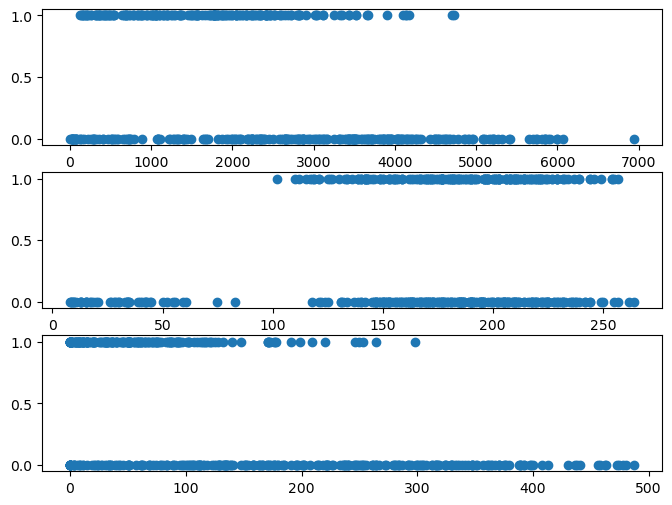

In [137]:
dataframe = pd.DataFrame(convert_one_hot(giro))
distance = dataframe.iloc[:, 3].values
vertical_meters = dataframe.iloc[:, 4].values
difficulty = dataframe.iloc[:, 5]
one_hot = dataframe.iloc[:, 7].values

fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize = (8,6))
ax1.scatter(vertical_meters, one_hot)
ax2.scatter(distance, one_hot)
ax3.scatter(difficulty, one_hot)

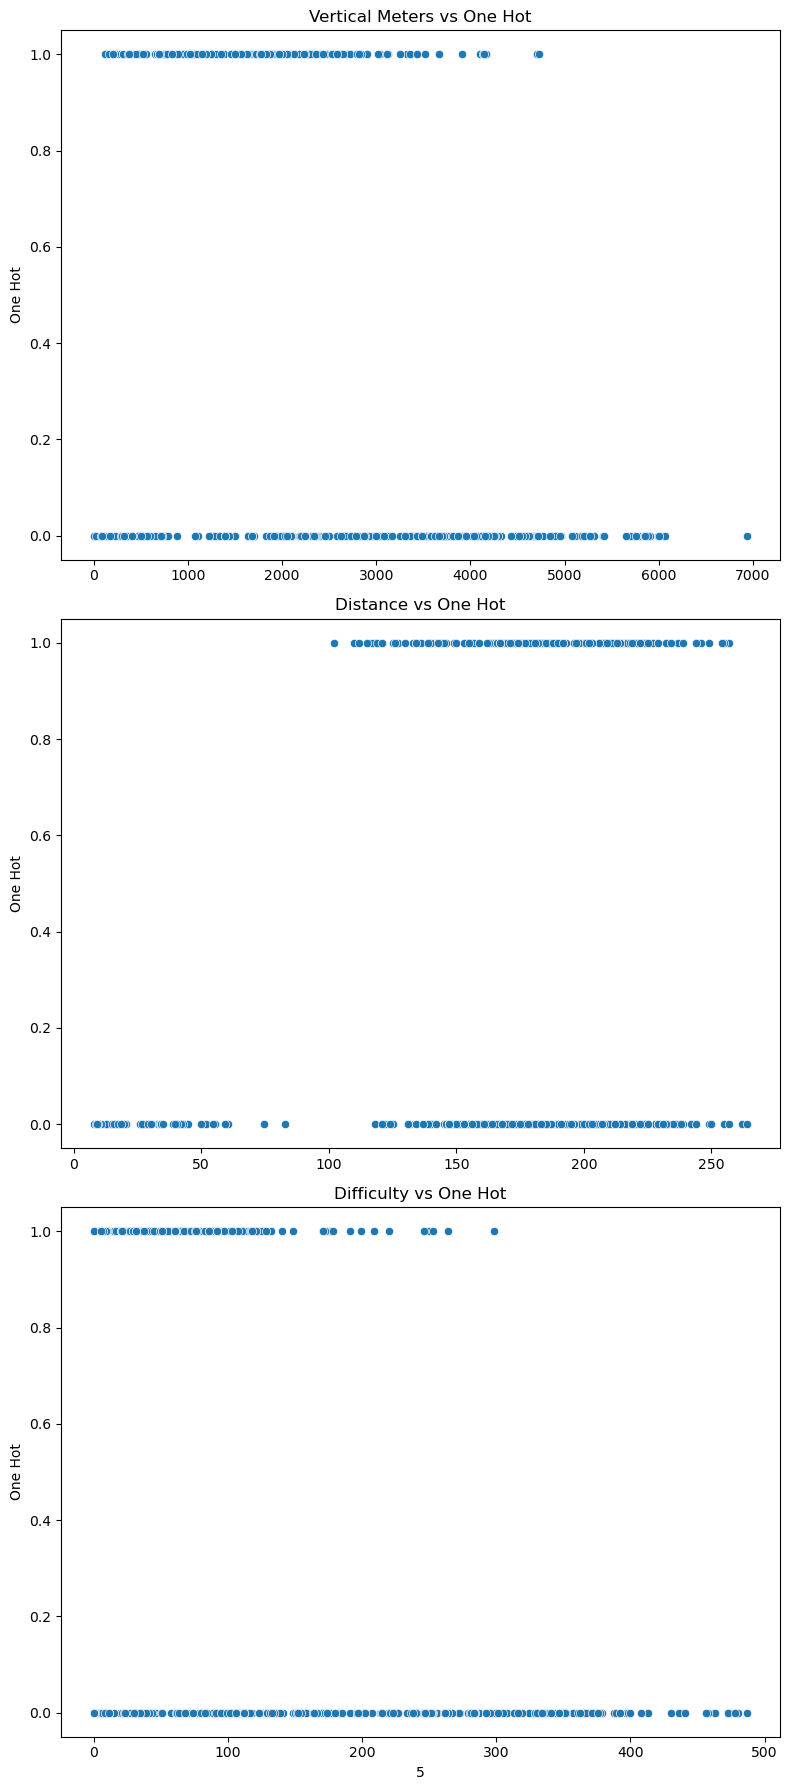

In [139]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 18))

# Scatter plot using Seaborn
sns.scatterplot(x=vertical_meters, y=one_hot, ax=ax1)
ax1.set_ylabel('One Hot')
ax1.set_title('Vertical Meters vs One Hot')

sns.scatterplot(x=distance, y=one_hot, ax=ax2)
ax2.set_ylabel('One Hot')
ax2.set_title('Distance vs One Hot')

sns.scatterplot(x=difficulty, y=one_hot, ax=ax3)
ax3.set_ylabel('One Hot')
ax3.set_title('Difficulty vs One Hot')

plt.tight_layout()
plt.show()